In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel(r"C:\Users\Yamin Hossain\Downloads\crop yeild data sheet - Copy.xlsx")
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230,80,28,80,24,20,12.0
1,480,60,36,70,20,18,8.0
2,1250,75,29,78,22,19,11.0
3,450,65,35,70,19,18,9.0
4,1200,80,27,79,22,19,11.0


In [4]:
df.describe()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,32.393939,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,5.426350,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,38.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


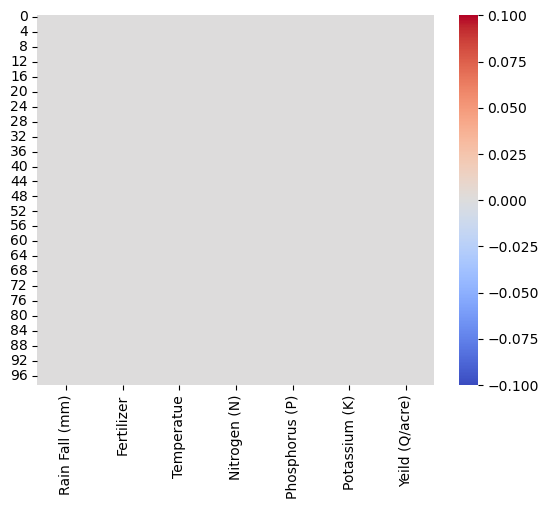

In [5]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<AxesSubplot:xlabel='Yeild (Q/acre)', ylabel='Density'>

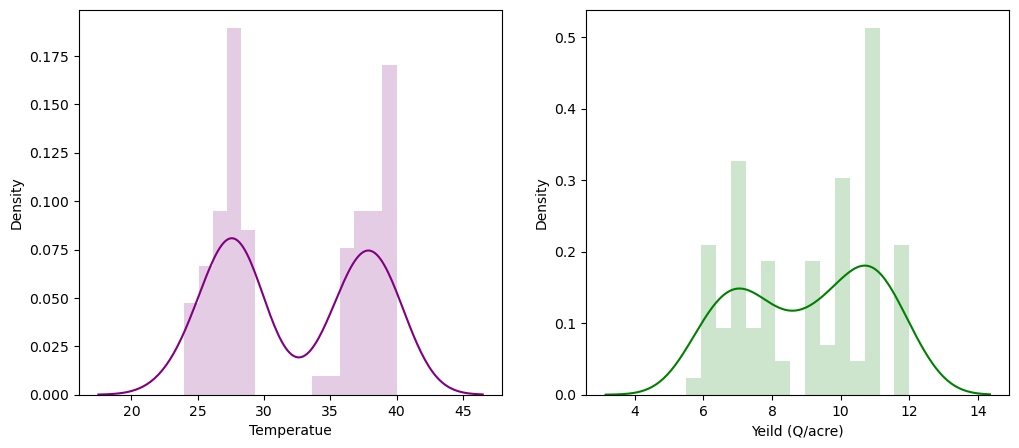

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['Temperatue'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1,2,2)
sns.distplot(df['Yeild (Q/acre)'],color="green",bins=15,hist_kws={'alpha':0.2})

<AxesSubplot:xlabel='count', ylabel='Yeild (Q/acre)'>

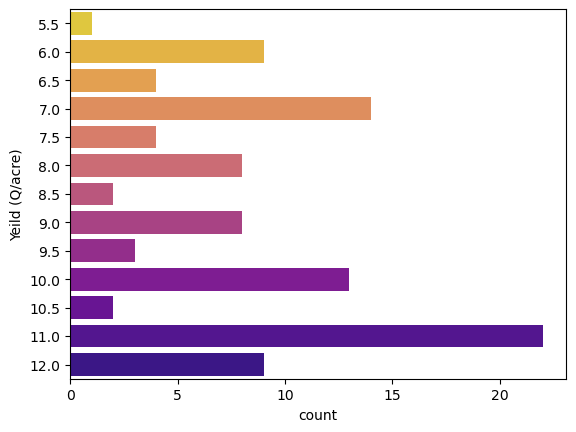

In [9]:
sns.countplot(y='Yeild (Q/acre)',data=df,palette="plasma_r")

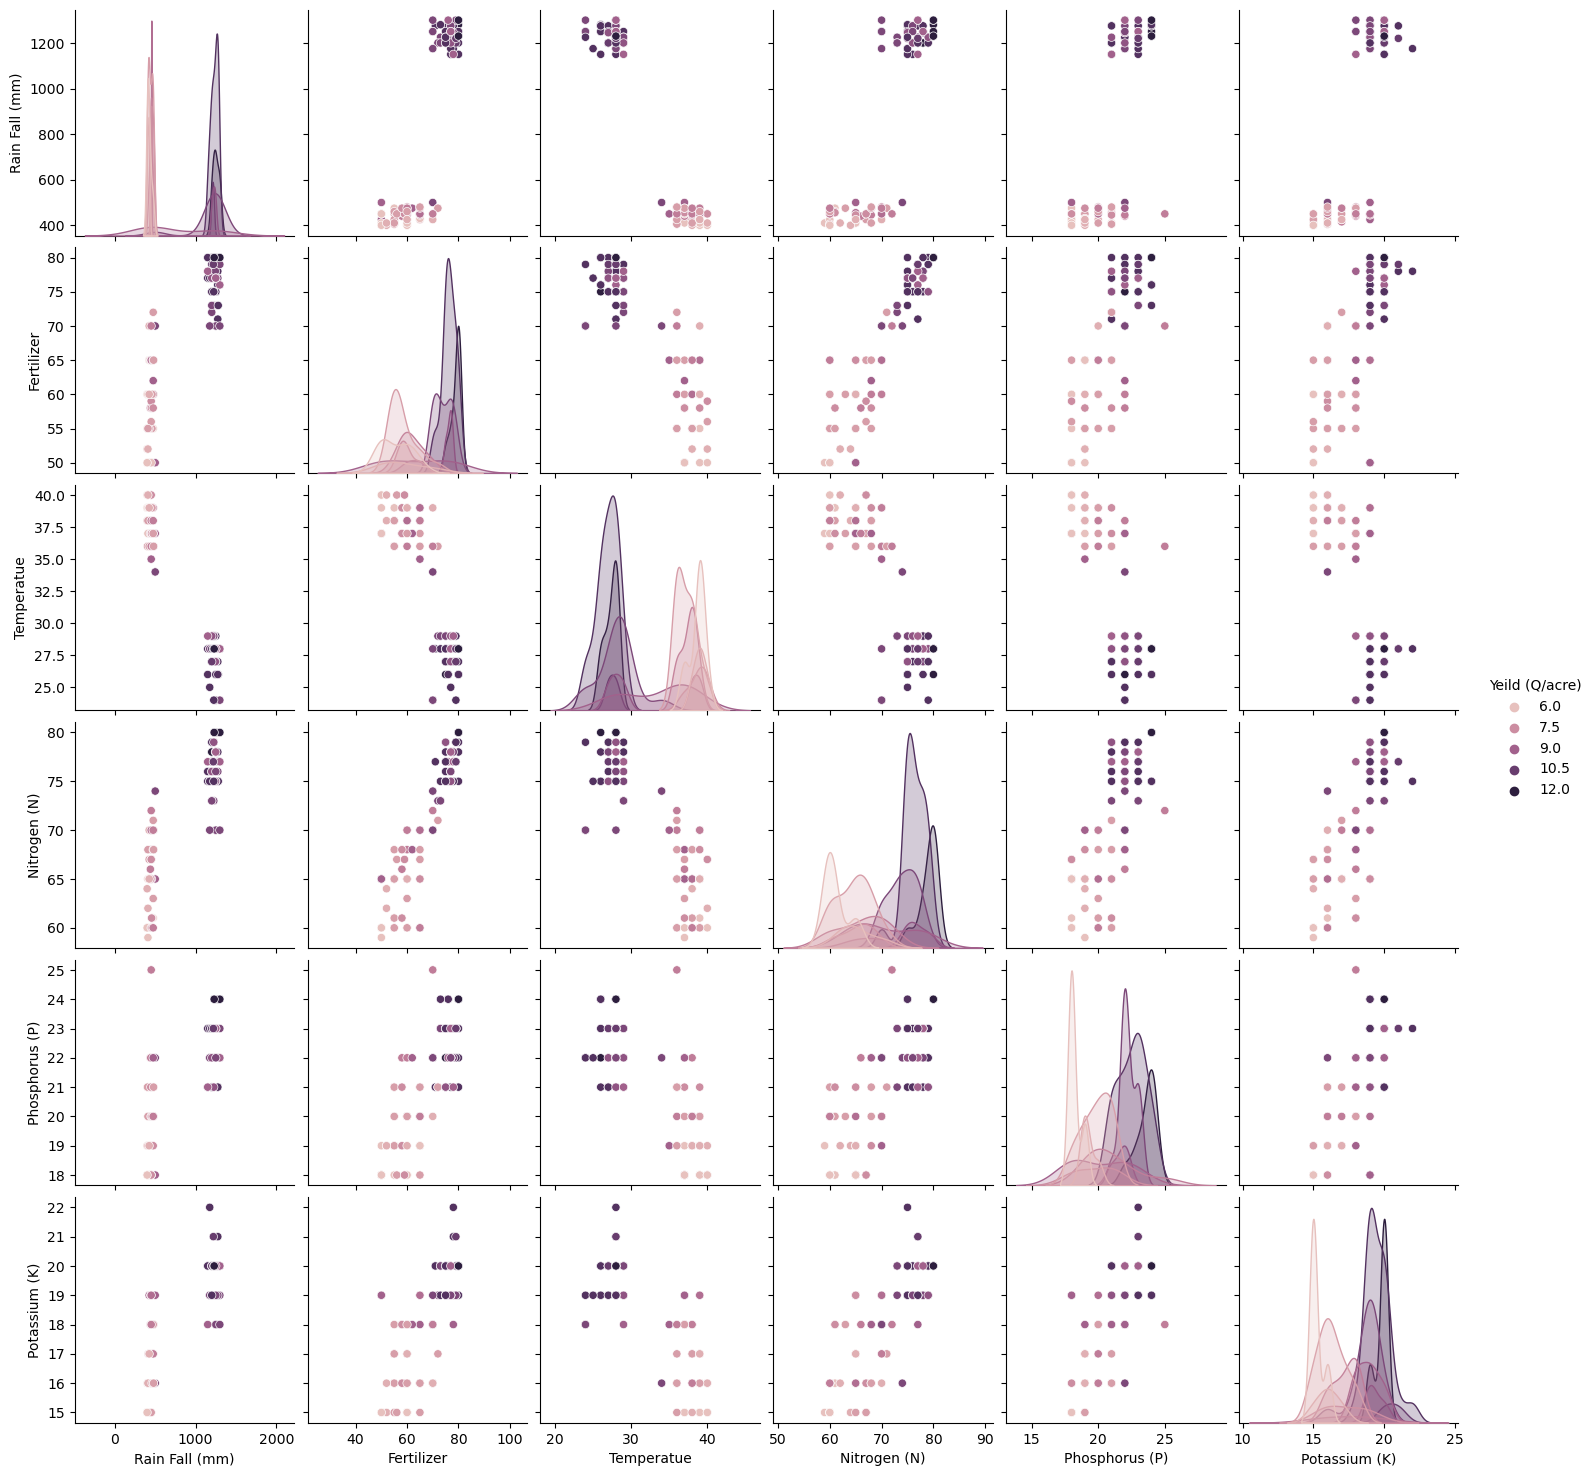

In [10]:
sns.pairplot(df, hue='Yeild (Q/acre)')

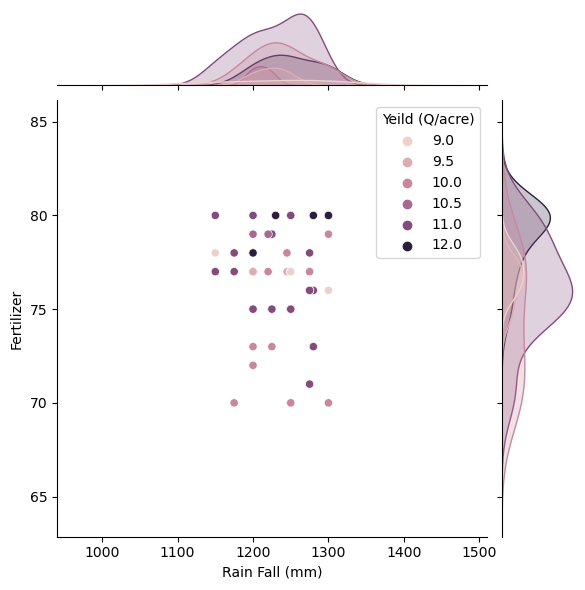

In [13]:
sns.jointplot(x="Rain Fall (mm)",y="Fertilizer",data=df[(df['Temperatue']<30) & (df['Rain Fall (mm)']>500)],hue="Yeild (Q/acre)")

In [14]:
df1=df.rename({'Rain Fall (mm)':'RF','Fertilizer':'F','Temperatue':'T','Nitrogen (N)':'N','Phosphorus (P)':'P','Potassium (K)':'K','Yeild (Q/acre)':'Y'},axis=1)

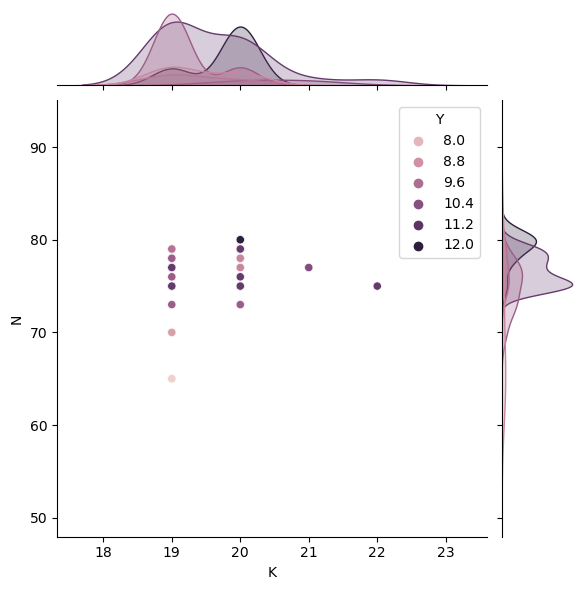

In [16]:
sns.jointplot(x="K",y="N",data=df1[(df1['N']>40)&(df1['K']>18)],hue="Y")

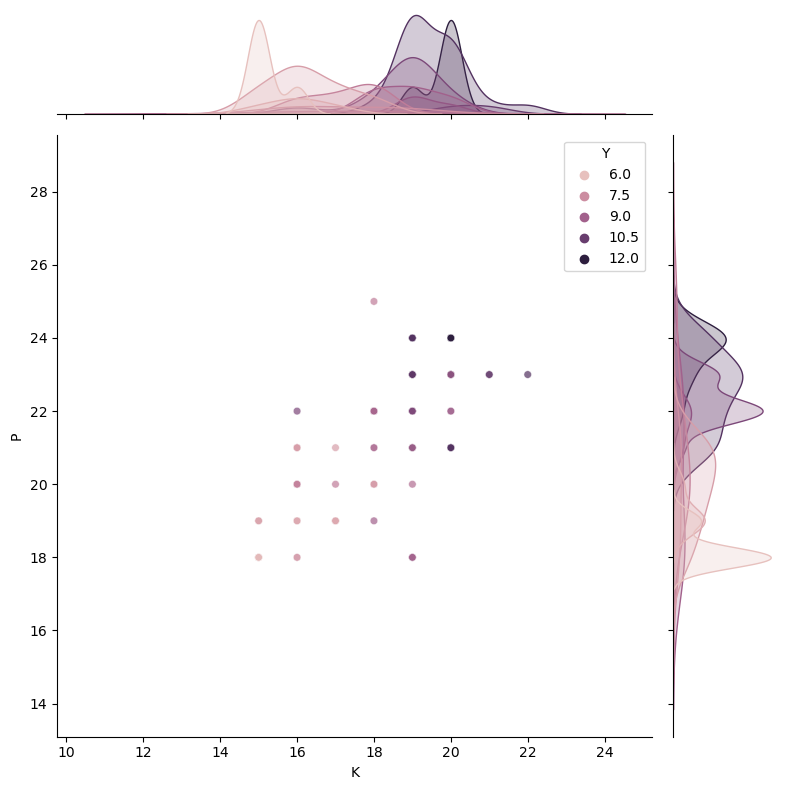

In [17]:
sns.jointplot(x="K",y="P",data=df1,hue='Y',size=8,s=30,alpha=0.7)

<AxesSubplot:xlabel='F', ylabel='Y'>

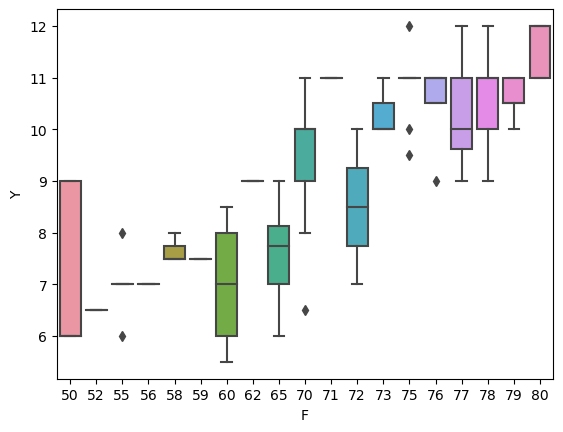

In [18]:
sns.boxplot(y='Y',x='F',data=df1)

<AxesSubplot:xlabel='P', ylabel='Y'>

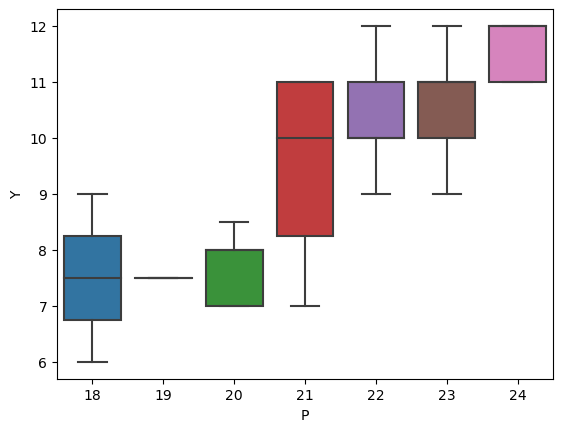

In [20]:
sns.boxplot(y='Y',x='P',data=df1[df1['RF']>450])

<AxesSubplot:xlabel='K', ylabel='RF'>

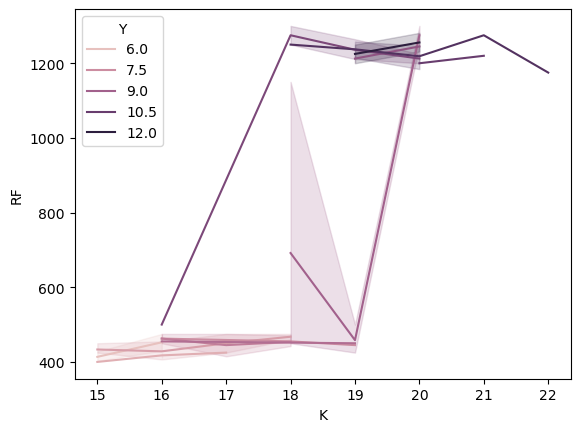

In [21]:
sns.lineplot(data = df1[(df1['T']<65)], x = "K", y = "RF",hue="Y")

#DATA PRE-PROCESSING

In [22]:
c=df1.Y.astype('category')
targets = dict(enumerate(c.cat.categories))
df1['target']=c.cat.codes

y=df1.target
X=df1[['N','P','K','T','F','RF']]

<AxesSubplot:>

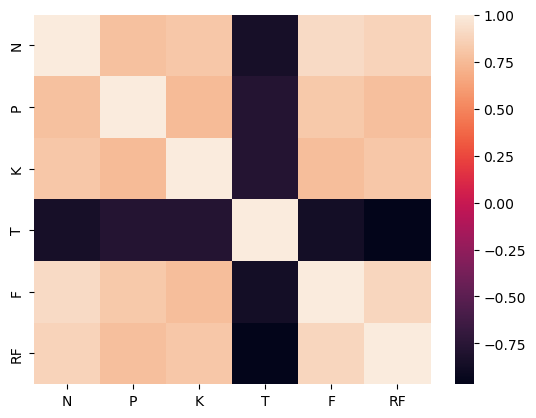

In [23]:
sns.heatmap(X.corr())

#FEATURE SCALING

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

#MODEL SELECTION

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.56

<AxesSubplot:>

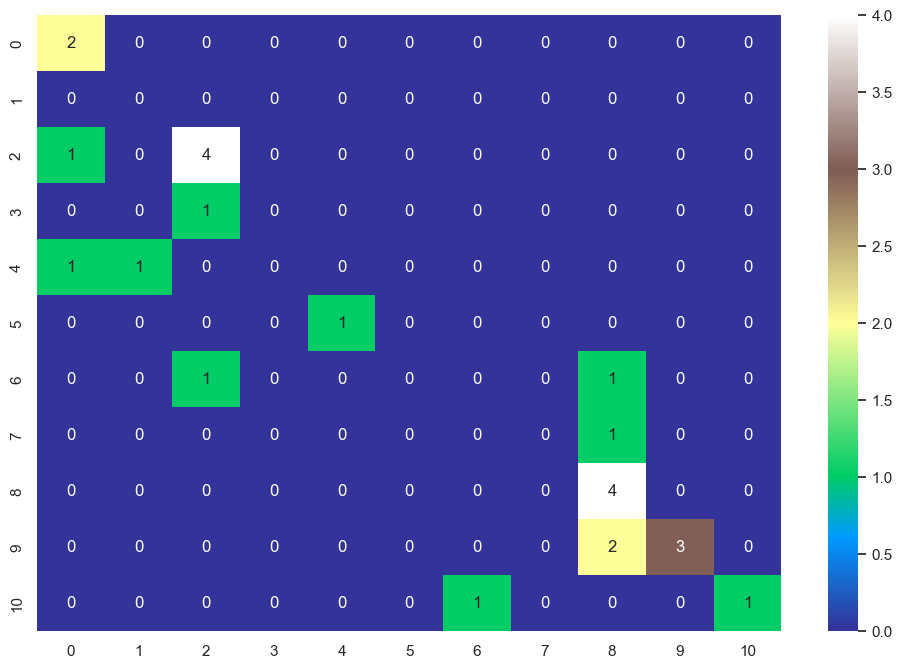

In [37]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat)
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

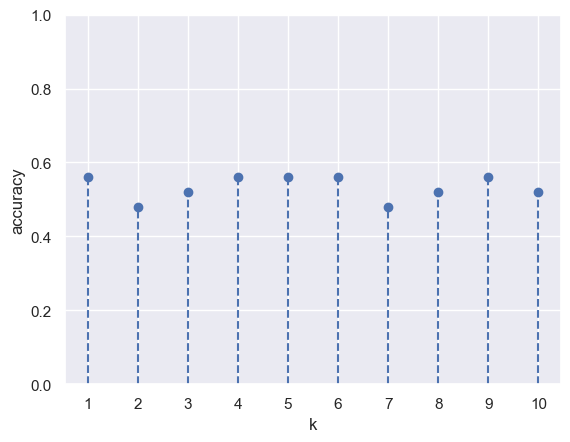

In [46]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.0,1.00)
plt.xticks([i for i in range(1,11)]);

Classification using Support Vector Classifer (SVC)

In [47]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.44
Rbf Kernel Accuracy:  0.52
Poly Kernel Accuracy:  0.6


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [49]:
print(model.best_score_ )
print(model.best_params_ )

0.4590643274853801
{'C': 0.1, 'gamma': 0.001}


Classifying using decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.4

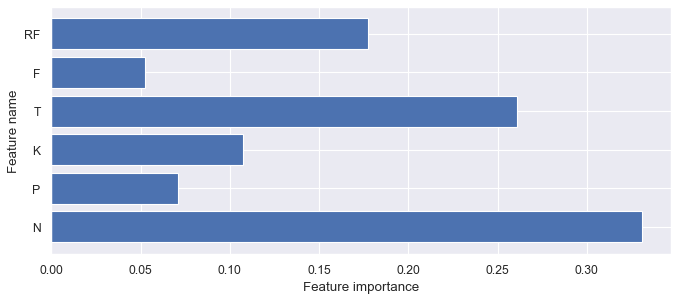

In [51]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

#Classification using Random Forest.

In [52]:
'''
max depth and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting. max_depth=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.
'''

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.78
RF Accuracy on test set: 0.52


     -------------------------------------- 282.6/282.6 kB 1.6 MB/s eta 0:00:00


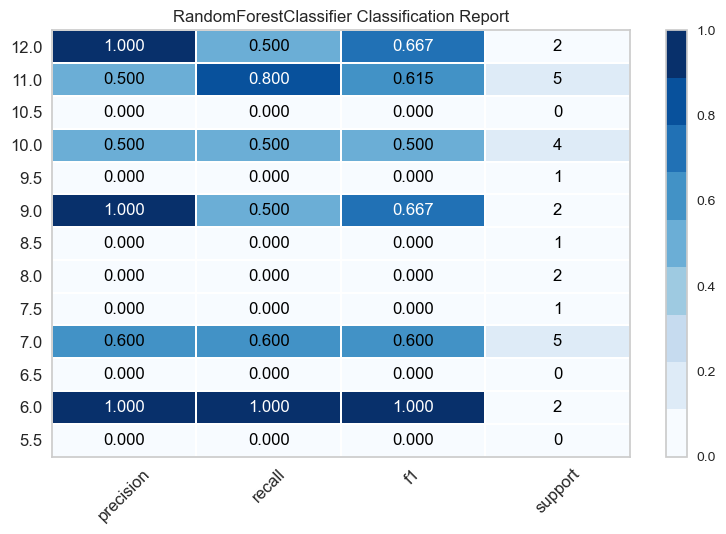

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [55]:
!pip install yellowbrick
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

#Classification using Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,y_test)))

Gradient Boosting accuracy : 0.48
